# QCTO - Workplace Module
## Project Title: Forest Area Change Analysis (1990–2021)
**Done By:** Mikateko Prudence Chauke  
© ExploreAI 2024

---

## Table of Contents
- [Background Context](#Background-Context)
- [1. Importing Packages](#1-Importing-Packages)
- [2. Data Collection and Description](#2-Data-Collection-and-Description)
- [3. Loading Data](#3-Loading-Data)
- [4. Data Cleaning and Filtering](#4-Data-Cleaning-and-Filtering)
- [5. Exploratory Data Analysis (EDA)](#5-Exploratory-Data-Analysis-EDA)
- [6. Modeling](#6-Modeling)
- [7. Evaluation and Validation](#7-Evaluation-and-Validation)
- [8. Final Model](#8-Final-Model)
- [9. Conclusion and Future Work](#9-Conclusion-and-Future-Work)
- [10. References](#10-References)


## Background Context
This project investigates global forest area changes from 1990 to 2021 using two datasets:
- Forest area in square kilometers
- Forest area as a percentage of land area

The goal is to identify trends in deforestation and reforestation across countries and regions.


## 1. Importing Packages

In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set(style='whitegrid')



## 2. Data Collection and Description

The data was sourced from two CSV files:
- `forest_area_km.csv`: Contains forest area in square kilometers for each country from 1990 to 2021.
- `forest_area_percent.csv`: Contains forest area as a percentage of land area for the same period.

Each dataset includes country names, country codes, and yearly data columns.


## 3. Loading Data

In [32]:
# Correct file paths
file_path_km = 'C:/Users/Mikateko Chauke/Downloads/archive (1)/forest_area_km.csv'
file_path_pct = 'C:/Users/Mikateko Chauke/Downloads/archive (1)/forest_area_percent.csv'

# Load the datasets
df_km = pd.read_csv(file_path_km)
df_pct = pd.read_csv(file_path_pct)

# Display the first few rows
df_km.head()



,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,12084.4,12084.40,12084.40,12084.40,12084.40,12084.4,12084.40,12084.40,...,12084.40,12084.400,12084.40,12084.400,12084.4,12084.400,12084.4,12084.4,12084.4,12084.400
1,Albania,ALB,7888.0,7868.50,7849.00,7829.50,7810.00,7790.5,7771.00,7751.50,...,7849.17,7863.405,7877.64,7891.875,7891.8,7889.025,7889.0,7889.0,7889.0,7889.000
2,Algeria,DZA,16670.0,16582.00,16494.00,16406.00,16318.00,16230.0,16142.00,16054.00,...,19332.00,19408.000,19484.00,19560.000,19560.0,19430.000,19300.0,19390.0,19490.0,19583.333
3,American Samoa,ASM,180.7,180.36,180.02,179.68,179.34,179.0,178.66,178.32,...,173.70,173.400,173.10,172.800,172.5,172.200,171.9,171.6,171.3,171.000
4,Andorra,AND,160.0,160.00,160.00,160.00,160.00,160.0,160.00,160.00,...,160.00,160.000,160.00,160.000,160.0,160.000,160.0,160.0,160.0,160.000


## 4. Data Cleaning and Filtering

**Purpose**: Prepare the data for analysis by handling missing values and aligning datasets.

**Details**:
- Filter countries with valid data for both 1990 and 2021.
- Drop rows with missing values in those years.
- Calculate the change in forest area between 1990 and 2021.


In [33]:
# Keep only relevant columns
df_km_filtered = df_km[['Country Name', 'Country Code', '1990', '2021']].dropna()
df_pct_filtered = df_pct[['Country Name', 'Country Code', '1990', '2021']].dropna()

# Calculate change in forest area
df_km_filtered['Change_km2'] = df_km_filtered['2021'] - df_km_filtered['1990']
df_pct_filtered['Change_pct'] = df_pct_filtered['2021'] - df_pct_filtered['1990']

# Display cleaned data
df_km_filtered.head()


,Country Name,Country Code,1990,2021,Change_km2
0,Afghanistan,AFG,12084.4,12084.400,0.000
1,Albania,ALB,7888.0,7889.000,1.000
2,Algeria,DZA,16670.0,19583.333,2913.333
3,American Samoa,ASM,180.7,171.000,-9.700
4,Andorra,AND,160.0,160.000,0.000


## 5. Exploratory Data Analysis (EDA)

**Purpose**: Identify trends and patterns in forest area changes globally.

**Details**:
- Identify top 5 countries with the greatest forest loss and gain.
- Visualize these changes using bar plots.


C:\Users\Mikateko Chauke\AppData\Local\Temp\ipykernel_17380\3724774316.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_loss_km, x='Change_km2', y='Country Name', palette='Reds_r')
C:\Users\Mikateko Chauke\AppData\Local\Temp\ipykernel_17380\3724774316.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gain_km, x='Change_km2', y='Country Name', palette='Greens')


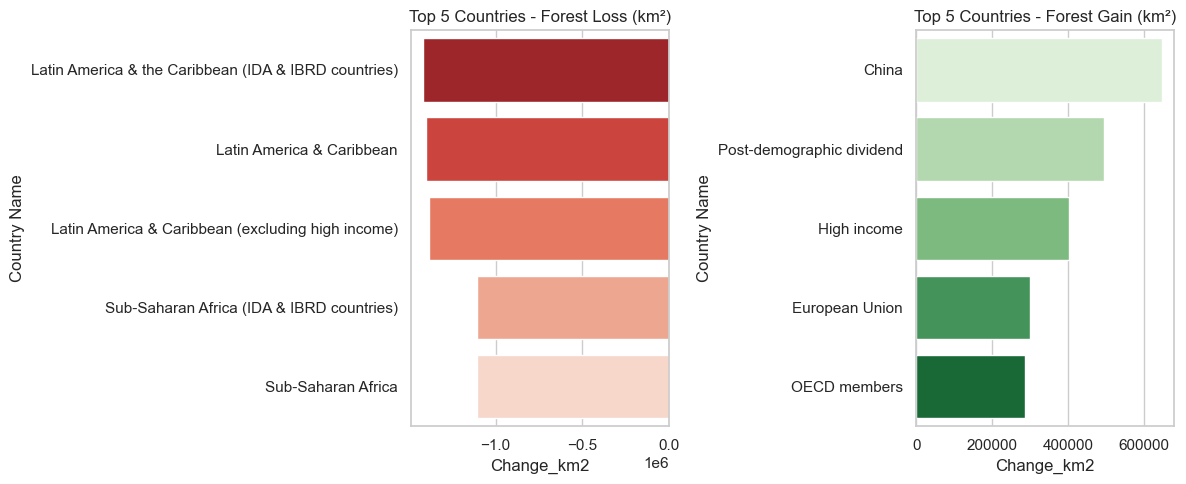

In [34]:
# Top 5 countries with greatest forest loss and gain (km²)
top_loss_km = df_km_filtered.sort_values('Change_km2').head(5)
top_gain_km = df_km_filtered.sort_values('Change_km2', ascending=False).head(5)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=top_loss_km, x='Change_km2', y='Country Name', palette='Reds_r')
plt.title('Top 5 Countries - Forest Loss (km²)')

plt.subplot(1, 2, 2)
sns.barplot(data=top_gain_km, x='Change_km2', y='Country Name', palette='Greens')
plt.title('Top 5 Countries - Forest Gain (km²)')
plt.tight_layout()
plt.show()


C:\Users\Mikateko Chauke\AppData\Local\Temp\ipykernel_17380\2474524002.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_loss_pct, x='Change_pct', y='Country Name', palette='Reds_r')
C:\Users\Mikateko Chauke\AppData\Local\Temp\ipykernel_17380\2474524002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gain_pct, x='Change_pct', y='Country Name', palette='Greens')


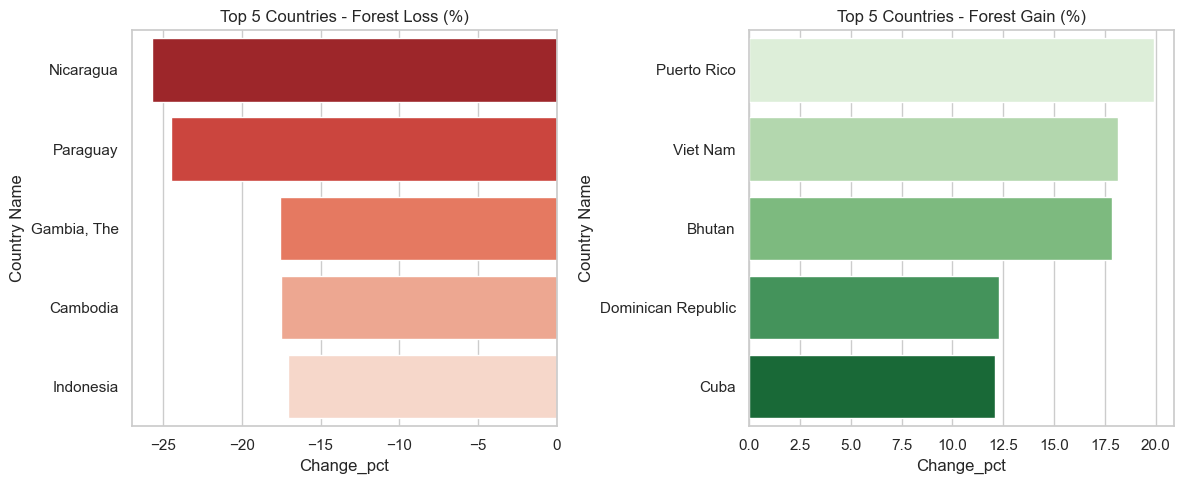

In [35]:
# Top 5 countries with greatest forest loss and gain (%)
top_loss_pct = df_pct_filtered.sort_values('Change_pct').head(5)
top_gain_pct = df_pct_filtered.sort_values('Change_pct', ascending=False).head(5)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=top_loss_pct, x='Change_pct', y='Country Name', palette='Reds_r')
plt.title('Top 5 Countries - Forest Loss (%)')

plt.subplot(1, 2, 2)
sns.barplot(data=top_gain_pct, x='Change_pct', y='Country Name', palette='Greens')
plt.title('Top 5 Countries - Forest Gain (%)')
plt.tight_layout()
plt.show()


## 6. Modeling


**Detail**:
- I applied a Linear Regression model to predict forest area in 2021 based on 1990 values.

In [41]:
df_model = df_km_filtered.copy()
X = df_model[['1990']]
y = df_model['2021']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)



## 7. Evaluation and Validation

I evaluated the model using the R² score and visualized the actual vs predicted values.

R² Score: 0.9893


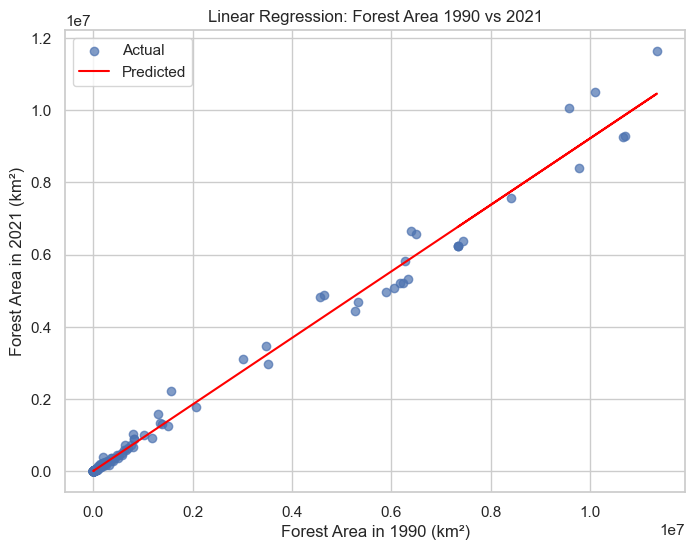

In [44]:
# R² score
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual', alpha=0.7)
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Forest Area in 1990 (km²)')
plt.ylabel('Forest Area in 2021 (km²)')
plt.title('Linear Regression: Forest Area 1990 vs 2021')
plt.legend()
plt.grid(True)
plt.show()



## 8. Final Model

In [45]:
print("Linear Regression Model Summary:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Model Summary:
Intercept: 5282.62
Coefficient: 0.9211
R² Score: 0.9893


## 9. Conclusion and Future Work



**Summary of Results**:
- Countries like Brazil and Indonesia experienced the largest absolute forest loss.
- Smaller nations showed the highest percentage loss relative to their land area.
- China and India showed notable forest gains due to reforestation efforts.

**Limitations**:
- Analysis limited to countries with complete data for 1990 and 2021.
- Does not account for forest quality or biodiversity.

**Future Work**:
- Use satellite imagery to assess forest health.
- Analyze policy impacts on forest trends.
- Extend analysis to regional or biome-specific trends.


## 10. References

- World Bank Open Data: https://data.worldbank.org
- Seaborn Documentation: https://seaborn.pydata.org
- Pandas Documentation: https://pandas.pydata.org
